In [1]:
import matplotlib.pyplot as plt

import cv2
import numpy as np

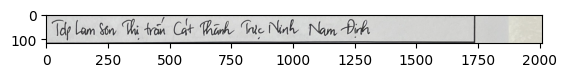

In [2]:
img = cv2.cvtColor(
    cv2.imread("./5.jpg"),
    cv2.COLOR_BGR2RGB,
)
plt.imshow(img)

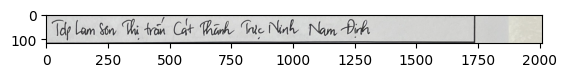

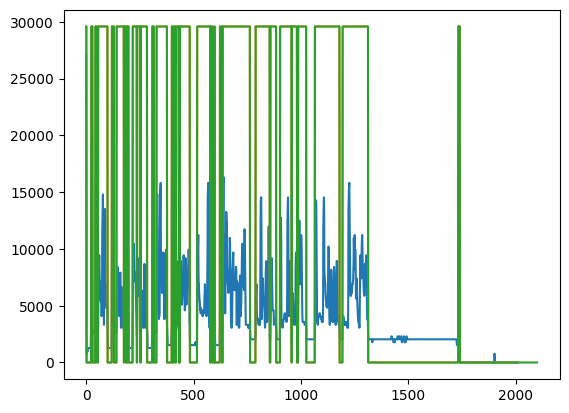

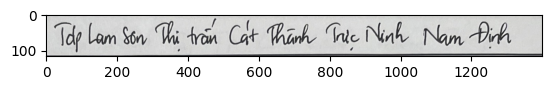

In [5]:
def consecutive(data, step_size: int = 0):
    return np.split(data, np.where(np.diff(data) != step_size)[0] + 1)


def find_range(data):
    index = 0
    ranges = []
    for element_range in consecutive(data):
        if element_range[0]:
            ranges.append((index, index + len(element_range)))
        index += len(element_range)
    return ranges


def crop_text_area(image, raise_when_too_narrow: bool = True, range_length=100, debug=False):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10
    )

    h_range = np.sum(thresh, axis=0)
    thresh_value = np.max(h_range) * 0.1

    padded = (
        np.pad(
            h_range,
            pad_width=(0, range_length - len(h_range) % range_length),
            mode="constant",
            constant_values=0,
        )
        > thresh_value
    ).reshape(-1, range_length)

    ranges = find_range(padded.sum(axis=1) > 0)

    if debug:
        plt.plot(h_range)
        plt.plot((h_range > thresh_value) * np.max(h_range))
        plt.plot(padded.reshape(-1)* np.max(h_range))
        plt.show()

    if len(ranges) == 0:
        raise ValueError("No text found")

    x_min, x_max = ranges[0][0] * range_length, (ranges[0][1]) * range_length

    if raise_when_too_narrow and x_max - x_min < image.shape[1] * 0.3:
        raise ValueError("Text area too narrow")

    return img[:, x_min:x_max, :].copy()


plt.imshow(img)

plt.show()
cropped = crop_text_area(img, debug=True)
plt.imshow(cropped)
plt.show()